# NLP LAB 2 – TEXT PREPROCESSING & NLTK ANALYSIS
Project: NLP-Labs
Dataset: news_corpus.jsonl (constructed in Lab 1)

------------------------------------------------------------
OBJECTIVE:
The objective of this lab is to perform fundamental Natural Language
Processing (NLP) tasks using the NLTK library on the constructed
news corpus.

This lab demonstrates the complete NLP preprocessing pipeline and
basic sentiment-based text classification.

TASKS PERFORMED:

1. Load the structured corpus generated in Lab 1.
2. Perform core NLP preprocessing steps:
       • Tokenization (word and sentence level)
       • Stopword removal
       • Stemming (Porter Stemmer)
       • Lemmatization (WordNet)
3. Apply linguistic analysis:
       • Part-of-Speech (POS) tagging
       • Named Entity Recognition (NER)
4. Perform Sentiment Analysis using VADER:
       • Compute compound sentiment score
       • Analyze average sentiment distribution
5. Build a Naive Bayes classifier:
       • Use extracted word features
       • Train and evaluate basic text classification
6. Generate Word Cloud visualizations:
       • Overall corpus
       • Class-based visualization (Fake vs Real)

LEARNING OUTCOMES:
This lab reinforces understanding of:
    • Text normalization techniques
    • Feature extraction from raw text
    • Rule-based sentiment analysis
    • Probabilistic text classification
    • Visual representation of textual data

The processed data and derived features will support
advanced modeling in Lab 3.

------------------------------------------------------------
Author: Mithil Pillai
Course: NLP Lab
Date: 22/02/2026

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\MYTH\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\MYTH\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\MYTH\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\MYTH\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\MYTH\AppData\Roaming\nltk_data...
[nltk_

True

In [2]:
# Load corpus
df = pd.read_json("data/news_corpus.jsonl", lines=True)

sample_text = df["text"].iloc[0]

print("===== SAMPLE TEXT PREVIEW =====")
print(sample_text[:400])

# Tokenization
tokens = nltk.word_tokenize(sample_text.lower())
sentences = nltk.sent_tokenize(sample_text)

print("\n===== TOKENIZATION =====")
print("First 20 Tokens:", tokens[:20])
print("First Sentence:", sentences[0])


===== SAMPLE TEXT PREVIEW =====
BERLIN (Reuters) - Germany s Social Democrats (SPD) faced pressure on Wednesday to consider offering coalition talks to Chancellor Angela Merkel s conservatives to settle the worst political crisis in modern German history. A leader of the smaller Free Democrats (FDP) also raised the possibility of reviving coalition talks with the conservatives and Greens that collapsed at the weekend raising fea

===== TOKENIZATION =====
First 20 Tokens: ['berlin', '(', 'reuters', ')', '-', 'germany', 's', 'social', 'democrats', '(', 'spd', ')', 'faced', 'pressure', 'on', 'wednesday', 'to', 'consider', 'offering', 'coalition']
First Sentence: BERLIN (Reuters) - Germany s Social Democrats (SPD) faced pressure on Wednesday to consider offering coalition talks to Chancellor Angela Merkel s conservatives to settle the worst political crisis in modern German history.


In [3]:
# Stopword removal
stop_words = set(stopwords.words("english"))
filtered = [w for w in tokens if w.isalpha() and w not in stop_words]

print("===== STOPWORD REMOVAL =====")
print("Original token count:", len(tokens))
print("After stopword removal:", len(filtered))
print("First 20 filtered tokens:", filtered[:20])

# Stemming
stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in filtered]

print("\n===== STEMMING =====")
print("First 20 stemmed tokens:", stemmed[:20])

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in filtered]

print("\n===== LEMMATIZATION =====")
print("First 20 lemmatized tokens:", lemmatized[:20])

# Stem vs Lemma Comparison
print("\n===== STEM vs LEMMA COMPARISON =====")
for o, s, l in zip(filtered[:10], stemmed[:10], lemmatized[:10]):
    print(f"{o:15} | {s:15} | {l}")

# POS tagging
pos_tags = nltk.pos_tag(tokens[:20])
print("\n===== POS TAGGING =====")
print(pos_tags)


===== STOPWORD REMOVAL =====
Original token count: 712
After stopword removal: 391
First 20 filtered tokens: ['berlin', 'reuters', 'germany', 'social', 'democrats', 'spd', 'faced', 'pressure', 'wednesday', 'consider', 'offering', 'coalition', 'talks', 'chancellor', 'angela', 'merkel', 'conservatives', 'settle', 'worst', 'political']

===== STEMMING =====
First 20 stemmed tokens: ['berlin', 'reuter', 'germani', 'social', 'democrat', 'spd', 'face', 'pressur', 'wednesday', 'consid', 'offer', 'coalit', 'talk', 'chancellor', 'angela', 'merkel', 'conserv', 'settl', 'worst', 'polit']

===== LEMMATIZATION =====
First 20 lemmatized tokens: ['berlin', 'reuters', 'germany', 'social', 'democrat', 'spd', 'faced', 'pressure', 'wednesday', 'consider', 'offering', 'coalition', 'talk', 'chancellor', 'angela', 'merkel', 'conservative', 'settle', 'worst', 'political']

===== STEM vs LEMMA COMPARISON =====
berlin          | berlin          | berlin
reuters         | reuter          | reuters
germany      

In [4]:
# NER
ner = nltk.ne_chunk(pos_tags)
print("NER:", ner)

NER: (S
  berlin/NN
  (/(
  reuters/NNS
  )/)
  -/:
  germany/NN
  s/VBP
  social/JJ
  democrats/NNS
  (/(
  spd/NN
  )/)
  faced/VBD
  pressure/NN
  on/IN
  wednesday/NN
  to/TO
  consider/VB
  offering/VBG
  coalition/NN)


In [5]:
# VADER sentiment
sia = SentimentIntensityAnalyzer()
df["sentiment"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])

print("Average sentiment:", df["sentiment"].mean())

Average sentiment: -0.023760739999999995


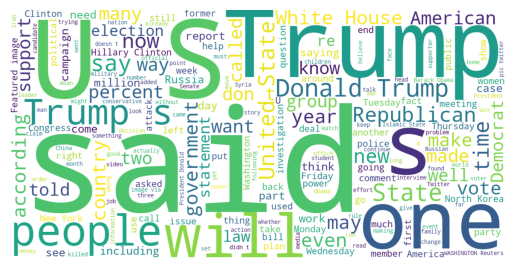

In [6]:

# WordCloud
all_text = " ".join(df["text"].astype(str))
wc = WordCloud(width=1200, height=600, background_color="white").generate(all_text)

plt.imshow(wc)
plt.axis("off")
plt.savefig("outputs/wordcloud.png")
plt.show()